# Graph Learning Methods

In [1]:
%load_ext autoreload
%autoreload 2
%cd '../src'
%matplotlib inline

/media/apfriend/sabrent/ucsd/classes/dsc190/project/src


In [16]:
import os
import sys
import re
import json
import warnings
import gudhi as gd
import pandas as pd
import numpy as np
import nglview as nv
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionWarning
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import eda as eda
import pda as pda

#hide discontinuous chain warnings
warnings.simplefilter('ignore', PDBConstructionWarning)

## Decision Tree Classifier

Since virus proteins seem to have more complex structures than compared to insulin or other basic molecules of life, a decision tree may classify data parsed thus far. Use a radius of 4.

In [4]:
point_cloud_data_fp='../data/out/birth_death_data.csv'

point_cloud_df=pda.get_point_cloud_df(point_cloud_data_fp)
point_cloud_df

,protein_tag,protein_name,num_atoms,num_chains,betti_0,betti_1,max_radius,num_vertices,num_simplices
1,1LU1,ABO-Blood-Type-Glycosyltransferases,1921,2,1,232,4,1921,35788
9,1LZI,ABO-Blood-Type-Glycosyltransferases,2610,2,5,362,4,2610,47295
17,2J1U,ABO-Blood-Type-Glycosyltransferases,2647,3,1,370,4,2647,48578
25,2OBS,ABO-Blood-Type-Glycosyltransferases,2629,2,12,313,4,2629,49797
33,3I0G,ABO-Blood-Type-Glycosyltransferases,2616,2,2,331,4,2616,49727
...,...,...,...,...,...,...,...,...,...
1529,2K6O,Dermcidin,2656,4,1,1,4,2656,1874906
1537,2YMK,Dermcidin,1010,3,6,14,4,1010,19185
1545,1IR3,Insulin-Receptor,2653,2,1,327,4,2653,50884
1553,1IRK,Insulin-Receptor,2574,1,1,297,4,2574,50565


In [10]:
point_cloud_df.protein_name.unique()

array(['ABO-Blood-Type-Glycosyltransferases', 'Actinomycin', 'Adenovirus',
       'Adrenergic-Receptors', 'Aminoglycoside-Antibiotics', 'Amyloids',
       'Antifreeze-Proteins', 'Apoptosomes', 'Aquaporin',
       'Auxin-and-TIR1-Ubiquitin-Ligase',
       'Broadly-Neutralizing-Antibodies', 'Phototropin',
       'cAMP-dependent-Protein-Kinase-(PKA)', 'Citric-Acid-Cycle',
       'Concanavalin-A-and-Circular-Permutation', 'Coronavirus-Protease',
       'Crystallins', 'Dengue-Virus', 'Designed-DNA-Crystal',
       'Designed-Protein-Cages', 'Designer-Insulins',
       'DNA-Methyltransferases', 'Ebola-Virus-Proteins', 'Enhanceosome',
       'Epidermal-Growth-Factor', 'GFP-like-Proteins', 'Glucagon',
       'Glucansucrase', 'HIV-Capsid', 'HIV-Envelope-Glycoprotein',
       'Hsp90', 'Hydrogenase',
       'Hypoxanthine-guanine-phosphoribosyltransferase-(HGPRT)',
       'Influenza-Neuraminidase', 'Inteins', 'Interferons',
       'Isocitrate-Dehydrogenase', 'Lactate-Dehydrogenase', 'Leptin',
     

In [5]:
classes=[
    'hormone',
    'virus',
    'hormone',    
    'hormone',
    'hormone',
    'virus',
    'hormone',
    'receptor',
    'receptor',
    'virus',
    'virus',
    'virus'
]
point_cloud_df['class']=classes
point_cloud_df

ValueError: Length of values (12) does not match length of index (196)

In [19]:
with open("categories.json", "rb") as file:
    categories=json.load(file)
    
point_cloud_df['class']=point_cloud_df.protein_name.apply(lambda x: categories[x])
point_cloud_df

,protein_tag,protein_name,num_atoms,num_chains,betti_0,betti_1,max_radius,num_vertices,num_simplices,class
1,1LU1,ABO-Blood-Type-Glycosyltransferases,1921,2,1,232,4,1921,35788,enzyme
9,1LZI,ABO-Blood-Type-Glycosyltransferases,2610,2,5,362,4,2610,47295,enzyme
17,2J1U,ABO-Blood-Type-Glycosyltransferases,2647,3,1,370,4,2647,48578,enzyme
25,2OBS,ABO-Blood-Type-Glycosyltransferases,2629,2,12,313,4,2629,49797,enzyme
33,3I0G,ABO-Blood-Type-Glycosyltransferases,2616,2,2,331,4,2616,49727,enzyme
...,...,...,...,...,...,...,...,...,...,...
1529,2K6O,Dermcidin,2656,4,1,1,4,2656,1874906,immune-system
1537,2YMK,Dermcidin,1010,3,6,14,4,1010,19185,immune-system
1545,1IR3,Insulin-Receptor,2653,2,1,327,4,2653,50884,receptor
1553,1IRK,Insulin-Receptor,2574,1,1,297,4,2574,50565,receptor


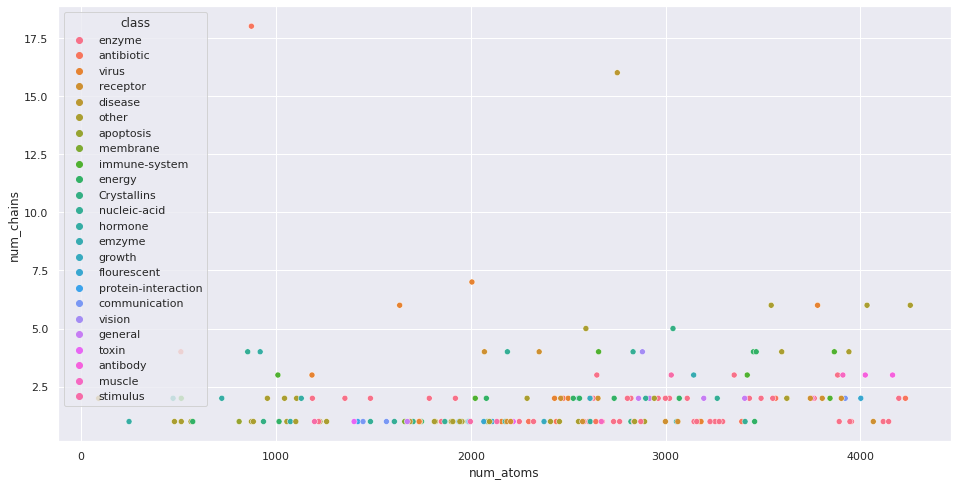

In [25]:
sns.set(rc={'figure.figsize':(16,8)})
sns.scatterplot(
    data=point_cloud_df,
    x='num_atoms',
    y='num_chains',
    hue='class'
)

plt.show()

In [30]:
point_cloud_df=point_cloud_df.loc[point_cloud_df['class'].isin(['hormone','enzyme','virus','antibiotic'])]
point_cloud_df

,protein_tag,protein_name,num_atoms,num_chains,betti_0,betti_1,max_radius,num_vertices,num_simplices,class
1,1LU1,ABO-Blood-Type-Glycosyltransferases,1921,2,1,232,4,1921,35788,enzyme
9,1LZI,ABO-Blood-Type-Glycosyltransferases,2610,2,5,362,4,2610,47295,enzyme
17,2J1U,ABO-Blood-Type-Glycosyltransferases,2647,3,1,370,4,2647,48578,enzyme
25,2OBS,ABO-Blood-Type-Glycosyltransferases,2629,2,12,313,4,2629,49797,enzyme
33,3I0G,ABO-Blood-Type-Glycosyltransferases,2616,2,2,331,4,2616,49727,enzyme
...,...,...,...,...,...,...,...,...,...,...
1393,1EI7,Tobacco-Mosaic-Virus,2804,2,3,332,4,2804,54415,enzyme
1401,2TMV,Tobacco-Mosaic-Virus,1354,2,6,105,4,1354,26844,enzyme
1449,1FVM,Vancomycin,874,18,1,80,4,874,17547,antibiotic
1457,2DLN,Vancomycin,2642,1,16,387,4,2642,47084,antibiotic


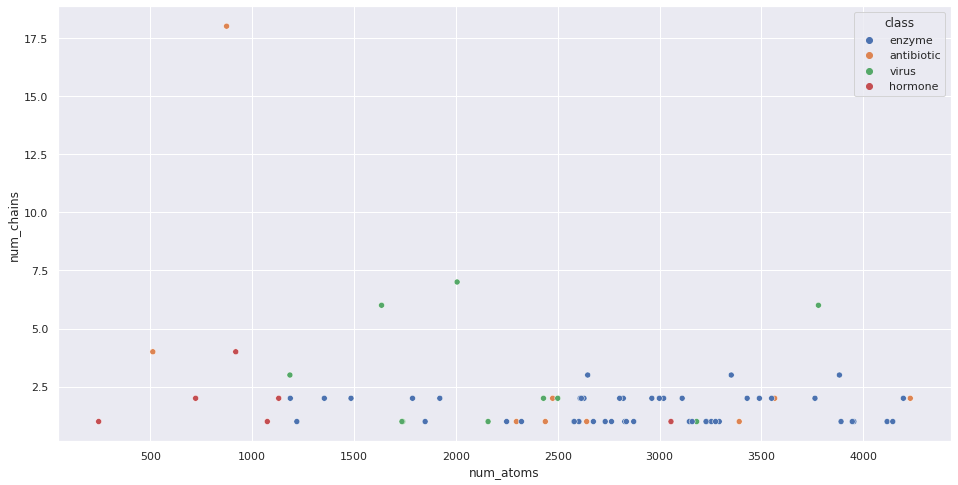

In [31]:
sns.set(rc={'figure.figsize':(16,8)})
sns.scatterplot(
    data=point_cloud_df,
    x='num_atoms',
    y='num_chains',
    hue='class'
)

plt.show()